In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, classification_report, confusion_matrix

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment Analysis/train.txt', delimiter=";", names=['Names', 'Label'])
df_train

,Names,Label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment Analysis/val.txt', delimiter=';', names=['Names', 'Label'])
df_val

,Names,Label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
df = pd.concat([df_val, df_train])

In [ ]:
df

,Names,Label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df.sample()

,Names,Label
515,i am feeling rejection low self esteem and pur...,sadness


In [ ]:
df.shape

(18000, 2)

<Axes: xlabel='Label', ylabel='count'>

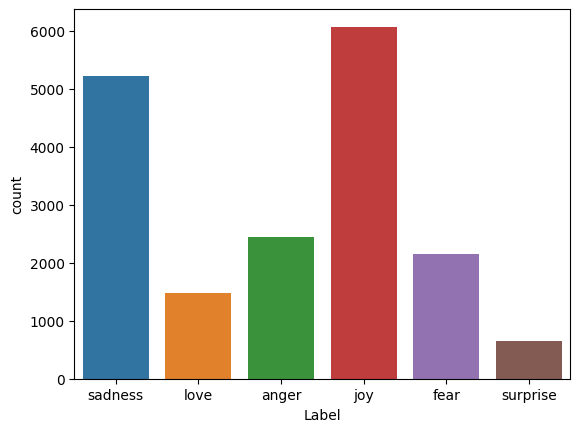

In [ ]:
sns.countplot(x=df.Label)

In [ ]:
def custom_encoder(df):
  df.replace(to_replace='sadness', value=0, inplace=True)
  df.replace(to_replace='anger', value=0, inplace=True)
  df.replace(to_replace='fear', value=0, inplace=True)
  df.replace(to_replace='joy', value=1, inplace=True)
  df.replace(to_replace='love', value=1, inplace=True)
  df.replace(to_replace='surprise', value=1, inplace=True)


In [ ]:
custom_encoder(df['Label'])

In [ ]:
df

,Names,Label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,1
3,i am just feeling cranky and blue,0
4,i can have for a treat or if i am feeling festive,1
...,...,...
17995,i just had a very brief time in the beanbag an...,0
17996,i am now turning and i feel pathetic that i am...,0
17997,i feel strong and good overall,1
17998,i feel like this was such a rude comment and i...,0


<Axes: xlabel='Label', ylabel='count'>

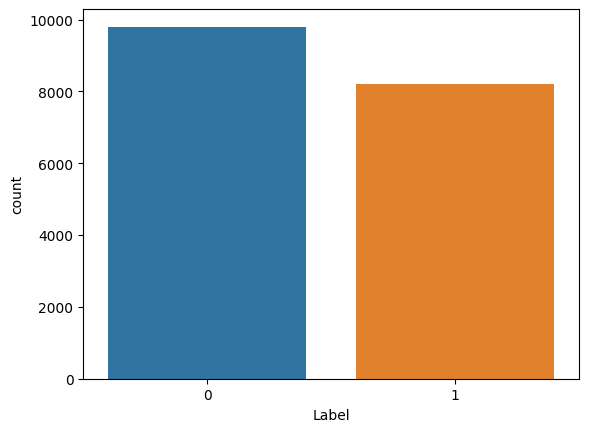

In [ ]:
sns.countplot(x=df.Label)

In [ ]:
lm = WordNetLemmatizer()

def text_transform(df):
  corpus = []
  for item in df:
    new_item = re.sub('[^a-zA-Z]', ' ', str(item))
    new_item = new_item.lower()
    new_item = new_item.split()
    new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(str(word) for word in new_item))
  return corpus

In [ ]:
import nltk
nltk.download('wordnet')

corpus = text_transform(df['Names'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#rcParams['figure.figsize'] = 20, 8
word_cloud = ""
for row in corpus:
  for word in row:
    word_cloud += " ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10)
wordcloud

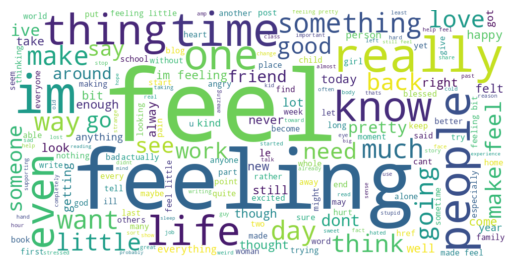

In [ ]:
wordcloud = wordcloud.generate(word_cloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
bow = vectorizer.fit_transform(corpus)
bow

<18000x117594 sparse matrix of type '<class 'numpy.int64'>'
	with 311217 stored elements in Compressed Sparse Row format>

In [ ]:
X = bow
y = df['Label']

In [ ]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [ ]:
#gridsearch = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True, n_jobs=-1)
#gridsearch.fit(X, y)
#gridsearch.best_params_

In [ ]:
rfc = RandomForestClassifier(max_features='auto',
                             n_estimators=500, 
                             max_depth=5, 
                             min_samples_split=5, 
                             min_samples_leaf=1, 
                             bootstrap=True)
rfc.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                       n_estimators=500)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment Analysis/test.txt', delimiter=';',names=['Names', 'Label'])
X_test, y_test = test_df['Names'], test_df['Label']
test_df = custom_encoder(y_test)
test_corpus = text_transform(X_test)
trasforemedTestData = vectorizer.transform(test_corpus)
predictions = rfc.predict(trasforemedTestData)

In [ ]:
acc_score = accuracy_score(y_test, predictions)
pre_score = precision_score(y_test, predictions)
rec_score = recall_score(y_test, predictions)
print(f'The accuracy score is {acc_score}')
print(f'The precision score is {pre_score}')
print(f'The recall score is {rec_score}')
print('*'*50)
cr = classification_report(y_test, predictions)
print(cr)

The accuracy score is 0.54
The precision score is 0.0
The recall score is 0.0
**************************************************
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1080
           1       0.00      0.00      0.00       920

    accuracy                           0.54      2000
   macro avg       0.27      0.50      0.35      2000
weighted avg       0.29      0.54      0.38      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

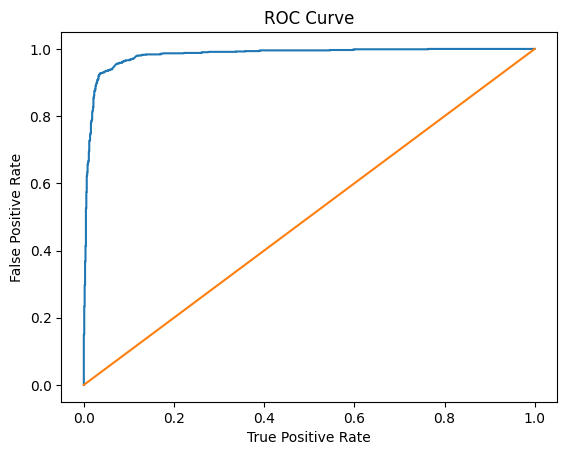

In [ ]:
predictions_probability = rfc.predict_proba(trasforemedTestData)
tpr, fpr, thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(tpr, fpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

In [ ]:
def expression_check(input):
  if input == 0:
    print("The input statement has negative sentiment")
  elif input == 1:
    print("The input statement has positive sentiment")
  else:
    print("Invalid Statement")

In [ ]:
def sentiment_checker(input):
  input = text_transform(input)
  inputVector = vectorizer.transform(input)
  predictions = rfc.predict(inputVector)
  expression_check(predictions)

In [ ]:
input1 = ["I am very sad"]

In [ ]:
sentiment_checker(input1)

The input statement has negative sentiment
